Loading the Data

In [8]:
import pandas as pd
import numpy as np

In [9]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4nwin_nm_blncd.csv")

In [10]:
df_0.head()

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3998.194,3998.676,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,KTX,ID,ID-KTX-068-2306-010_002,0.009999,0.010936,0.012060,0.013193,0.014161,0.014829,0.015131,...,-0.000237,-0.000224,-0.000193,-0.000141,-0.000068,Group 3,Group 2,Group 4,Indonesia,Non-Thai
1,KBX,ID,ID-KBX-068-2307-015_002_adah2opik,0.011787,0.012684,0.013509,0.014131,0.014446,0.014396,0.013982,...,0.000856,0.000782,0.000682,0.000577,0.000490,Group 3,Group 2,Group 4,Indonesia,Non-Thai
2,SUX,ID,ID-SUX-073-2311-001_005,0.018855,0.018050,0.017008,0.015901,0.014902,0.014138,0.013663,...,0.000310,0.000339,0.000396,0.000478,0.000577,Group 3,Group 2,Group 3,Indonesia,Non-Thai
3,KTX,ID,ID-KTX-068-2306-002_005,0.013460,0.013085,0.013149,0.013695,0.014654,0.015859,0.017094,...,-0.000523,-0.000566,-0.000579,-0.000557,-0.000494,Group 3,Group 2,Group 4,Indonesia,Non-Thai
4,KTX,ID,ID-KTX-068-2308-035_004,0.011486,0.011184,0.010776,0.010319,0.009914,0.009674,0.009681,...,-0.002519,-0.002572,-0.002616,-0.002649,-0.002678,Group 3,Group 2,Group 4,Indonesia,Non-Thai


Selecting Regions of Interest

In [11]:
# Define the regions of interest
regions_of_interest = [
    (2986, 3026), (2933, 2973), (2902, 2942), (2833, 2873),
    (1480, 2020), (1445, 1485), (1398, 1438), (1358, 1398),
    (1215, 1255), (1140, 1180), (1096, 1136), (1078, 1118),
    (1000, 910), (702, 742)
]

# Extract columns corresponding to the regions of interest
columns_to_focus = []
for start, end in regions_of_interest:
    columns_to_focus.extend([col for col in df_0.columns[4:-5] if start <= float(col) <= end])

# Create a new DataFrame with the selected regions
df_0_selected_regions = df_0[columns_to_focus]

# Combine the selected regions with the target column and other relevant columns
df_0_selected_regions = pd.concat([df_0[['thnoth_name', 'prov_char']], df_0_selected_regions], axis=1)

# Save the DataFrame for further processing
#df_0_selected_regions.to_csv('data/data file 2/data_1.csv', index=False)


FUNCTIONS

Baseline Correction

In [12]:
# from scipy.signal import savgol_filter

# # Function for baseline correction with dynamic window length
# def baseline_correction(spectrum, default_window_length=15, polyorder=3):
#     spectrum_length = len(spectrum)
#     if spectrum_length < default_window_length:
#         window_length = spectrum_length // 2 * 2 + 1  # Make window length odd and less than the size of the spectrum
#     else:
#         window_length = default_window_length
#     baseline = savgol_filter(spectrum, window_length, polyorder, mode='nearest')
#     corrected_spectrum = spectrum - baseline
#     return corrected_spectrum

# # Apply baseline correction
# df_baseline_corrected_v0 = df_0_selected_regions.copy()
# for col in columns_to_focus:
#     df_baseline_corrected_v0[col] = baseline_correction(df_baseline_corrected_v0[col])

# # Save the baseline corrected data
# # df_baseline_corrected_v0.to_csv('data/data file 2/data_1_bslcrct.csv', index=False)

SavGol Smoothing

In [13]:
# # Function for Savitzky-Golay smoothing
# def savitzky_golay_smoothing(spectrum, default_window_length=11, polyorder=2):
#     window_length = min(default_window_length, len(spectrum) // 2 * 2 + 1)  # Make window length odd and less than or equal to the size of the spectrum
#     if window_length < 3:  # Ensure window length is at least 3
#         window_length = 3
#     return savgol_filter(spectrum, window_length, polyorder, mode='nearest')  # Set mode to 'nearest'

# # Apply smoothing
# df_smoothed_v0 = df_baseline_corrected_v0.copy()
# for col in columns_to_focus:
#     df_smoothed_v0[col] = savitzky_golay_smoothing(df_smoothed_v0[col])

# # Save the smoothed data
# # df_smoothed_v0.to_csv('data/data file 2/data_1_smoothed.csv', index=False)


Normalization

In [14]:
# # Function for normalization (Min-Max scaling)
# def min_max_normalization(spectrum):
#     return (spectrum - np.min(spectrum)) / (np.max(spectrum) - np.min(spectrum))

# # Apply normalization
# df_normalized_v0 = df_smoothed_v0.copy()
# for col in columns_to_focus:
#     df_normalized_v0[col] = min_max_normalization(df_normalized_v0[col])

# # Save the normalized data
# # df_normalized_v0.to_csv('data/data file 2/data_1_normalized.csv', index=False)


Derivatization (np.gradient)

In [15]:
# # Calculate the first derivative using np.gradient
# data_spectrum = df_normalized_v0.iloc[:, 2:].values
# first_derivative_np = np.gradient(data_spectrum, axis=1)

# # Calculate the second derivative using np.gradient
# second_derivative_np = np.gradient(first_derivative_np, axis=1)

# # Convert the results back to DataFrame
# data_1_der_np = pd.DataFrame(first_derivative_np, columns=df_normalized_v0.columns[2:])
# data_2_der_np = pd.DataFrame(second_derivative_np, columns=df_normalized_v0.columns[2:])

# # Combine the first two columns from the original dataset with the np.gradient derivatives

# # Extract the first two columns
# first_two_columns = df_normalized_v0.iloc[:, :2]

# # Combine the first two columns with the derivatives
# data_1_der_combined = pd.concat([first_two_columns, data_1_der_np], axis=1)
# data_2_der_combined = pd.concat([first_two_columns, data_2_der_np], axis=1)

# # Export the combined data to CSV
# # data_1_der_combined.to_csv('data/data file 2/data_1_1_der.csv', index=False)
# # data_2_der_combined.to_csv('data/data file 2/data_1_2_der.csv', index=False)

Derivatization (SavGol)

In [16]:
# # Extract the spectrum data
# data_spectrum = df_normalized_v0.iloc[:, 2:].values

# # Apply Savitzky-Golay filter for the first derivative
# first_derivative_savgol = savgol_filter(data_spectrum, window_length=5, polyorder=2, deriv=1, axis=1)

# # Apply Savitzky-Golay filter for the second derivative
# second_derivative_savgol = savgol_filter(data_spectrum, window_length=5, polyorder=2, deriv=2, axis=1)

# # Convert the results back to DataFrame
# data_1_der_savgol = pd.DataFrame(first_derivative_savgol, columns=df_normalized_v0.columns[2:])
# data_2_der_savgol = pd.DataFrame(second_derivative_savgol, columns=df_normalized_v0.columns[2:])

# # Extract the first two columns
# first_two_columns = df_normalized_v0.iloc[:, :2]

# # Combine the first two columns with the Savitzky-Golay derivatives
# data_1_der_savgol_combined = pd.concat([first_two_columns, data_1_der_savgol], axis=1)
# data_2_der_savgol_combined = pd.concat([first_two_columns, data_2_der_savgol], axis=1)

# # Export the combined data to CSV
# # data_1_der_savgol_combined.to_csv('data/data file 2/data_1_1_der_savgol.csv', index=False)
# # data_2_der_savgol_combined.to_csv('data/data file 2/data_1_2_der_savgol.csv', index=False)

SNV

In [17]:
# def snv(spectrum):
#     return (spectrum - np.mean(spectrum)) / np.std(spectrum)

# # Apply SNV to the selected regions
# df_snv = df_0_selected_regions.copy()
# for col in columns_to_focus:
#     df_snv[col] = snv(df_snv[col])

# # Save the SNV data
# # df_snv.to_csv('data/data file 2/data_1_snv.csv', index=False)


Random Normal Variate (RNV)

In [18]:
# def rnv(spectrum):
#     random_noise = np.random.normal(0, np.std(spectrum), spectrum.shape)
#     return spectrum + random_noise

# # Apply RNV to the selected regions
# df_rnv = df_0_selected_regions.copy()
# for col in columns_to_focus:
#     df_rnv[col] = rnv(df_rnv[col])

# # Save the RNV data
# # df_rnv.to_csv('data/data file 2/data_1_rnv.csv', index=False)


Multiplicative Scatter Correction (MSC)

In [19]:
# def msc(spectrum, reference):
#     mean_spectrum = np.mean(reference, axis=0)
#     fit = np.polyfit(mean_spectrum, spectrum, 1, full=True)
#     corrected_spectrum = (spectrum - fit[0][1]) / fit[0][0]
#     return corrected_spectrum

# # Apply MSC to the selected regions
# df_msc = df_0_selected_regions.copy()
# for col in columns_to_focus:
#     df_msc[col] = msc(df_msc[col])

# # Save the MSC data
# df_msc.to_csv('data/data file 2/data_1_msc2.csv', index=False)


In [20]:
# Multiplicative Scatter Correction (MSC) function
# def msc(input_data):
#     # Mean center the data
#     mean_spectrum = np.mean(input_data, axis=0)
#     input_data_centered = input_data - mean_spectrum

#     # Perform MSC
#     reference = np.mean(input_data, axis=0)
#     msc_data = np.zeros_like(input_data)

#     for i in range(input_data.shape[0]):
#         fit = np.polyfit(reference, input_data_centered[i, :], 1, full=True)
#         msc_data[i, :] = (input_data_centered[i, :] - fit[0][1]) / fit[0][0]
    
#     return msc_data

# # Extract the spectral data from the dataframe
# spectral_data = df_0_selected_regions.iloc[:, 2:].values

# # Apply MSC
# msc_corrected_data = msc(spectral_data)

# # Create a new dataframe with the MSC corrected data
# msc_df = pd.DataFrame(msc_corrected_data, columns=df_0_selected_regions.columns[2:])
# msc_df.insert(0, 'prov_char', df_0_selected_regions['prov_char'])
# msc_df.insert(0, 'thnoth_name', df_0_selected_regions['thnoth_name'])

# # Save the MSC corrected data to a new CSV file
# msc_corrected_file_path = 'data/data file 2/data_1_msc_corrected.csv'
# msc_df.to_csv(msc_corrected_file_path, index=False)


Classification and Evaluation (40-fold)

In [21]:
# Define the target variable
target = 'thnoth_name'

# Ensure columns_to_focus are correctly identified
numeric_cols_df_0 = df_0_selected_regions.select_dtypes(include=[np.number]).columns.tolist()
columns_to_focus = numeric_cols_df_0  # Ensure columns are correctly selected

# # Classification and evaluation function using 40-fold CV
# def classify_and_evaluate(df, columns):
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.model_selection import cross_val_score
#     from sklearn.preprocessing import LabelEncoder

#     # Encode target variable
#     le = LabelEncoder()
#     y = le.fit_transform(df[target])

#     # Define features
#     X = df[columns]

#     # Initialize the classifier
#     model = RandomForestClassifier(n_estimators=100, random_state=42)

#     # Perform cross-validation
#     scores = cross_val_score(model, X, y, cv=40)

#     # Print the results
#     print(f'Cross-Validation Accuracy: {np.mean(scores)}')


In [22]:

# # Evaluate each preprocessing method
# print("Evaluation for No Preprocessing:")
# classify_and_evaluate(df_0_selected_regions, columns_to_focus)

In [23]:
# print("Evaluation for Baseline Correction:")
# df_baseline_corrected_v0z = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
# classify_and_evaluate(df_baseline_corrected_v0z, columns_to_focus)

In [24]:
# print("Evaluation for Smoothing:")
# df_smoothed_v0z = pd.read_csv('data/data file 2/data_1_smoothed.csv')
# classify_and_evaluate(df_smoothed_v0z, columns_to_focus)

In [25]:
# print("Evaluation for Normalization:")
# df_normalized_v0z = pd.read_csv('data/data file 2/data_1_normalized.csv')
# classify_and_evaluate(df_normalized_v0z, columns_to_focus)

In [26]:
# print("Evaluation for 1-Derivative Spectroscopy:")
# data_1_der_combined_v0z = pd.read_csv('data/data file 2/data_1_1_der.csv')
# classify_and_evaluate(data_1_der_combined_v0z, columns_to_focus)

In [27]:
# print("Evaluation for 2-Derivative Spectroscopy:")
# data_2_der_combined_v0z = pd.read_csv('data/data file 2/data_1_2_der.csv')
# classify_and_evaluate(data_2_der_combined_v0z, columns_to_focus)

In [28]:
# print("Evaluation for 1-SG-Derivative Spectroscopy:")
# data_1_der_savgol_combined_v0z = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
# classify_and_evaluate(data_1_der_savgol_combined_v0z, columns_to_focus)

In [29]:
# print("Evaluation for 2-SG-Derivative Spectroscopy:")
# data_1_der_savgol_combined_v0z = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
# classify_and_evaluate(data_1_der_savgol_combined_v0z, columns_to_focus)

In [30]:
# print("Evaluation for SNV:")
# df_snv_v0z = pd.read_csv('data/data file 2/data_1_snv.csv')
# classify_and_evaluate(df_snv_v0z, columns_to_focus)

# print("Evaluation for RNV:")
# df_rnv_v0z = pd.read_csv('data/data file 2/data_1_rnv.csv')
# classify_and_evaluate(df_rnv_v0z, columns_to_focus)

# print("Evaluation for MSC:")
# df_msc_v0z = pd.read_csv('data/data file 2/data_1_msc.csv')
# classify_and_evaluate(df_msc_v0z, columns_to_focus)

Classification and Evaluation (40-fold) -with extra detailed

In [31]:
# # Define the target variable
# target = 'thnoth_name'

# # Ensure columns_to_focus are correctly identified
# numeric_cols_df_0 = df_0_selected_regions.select_dtypes(include=[np.number]).columns.tolist()
# columns_to_focus = numeric_cols_df_0  # Ensure columns are correctly selected

# # Classification and evaluation function using 40-fold CV with detailed metrics
# def classify_and_evaluate(df, columns):
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.model_selection import cross_val_score, StratifiedKFold
#     from sklearn.preprocessing import LabelEncoder
#     from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#     import numpy as np

#     # Encode target variable
#     le = LabelEncoder()
#     y = le.fit_transform(df[target])

#     # Define features
#     X = df[columns]

#     # Initialize the classifier
#     model = RandomForestClassifier(n_estimators=100, random_state=42)

#     # Initialize Stratified K-Fold Cross-Validation
#     skf = StratifiedKFold(n_splits=40)

#     # Arrays to store results
#     accuracies = []
#     precisions = []
#     recalls = []
#     f1_scores = []
#     conf_matrices = []

#     # Perform cross-validation
#     for train_idx, test_idx in skf.split(X, y):
#         X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#         y_train, y_test = y[train_idx], y[test_idx]

#         # Train the model
#         model.fit(X_train, y_train)

#         # Predict and evaluate
#         y_pred = model.predict(X_test)
#         accuracies.append(accuracy_score(y_test, y_pred))
#         precisions.append(precision_score(y_test, y_pred, average=None))
#         recalls.append(recall_score(y_test, y_pred, average=None))
#         f1_scores.append(f1_score(y_test, y_pred, average=None))
#         conf_matrices.append(confusion_matrix(y_test, y_pred))

#     # Calculate mean scores
#     mean_accuracy = np.mean(accuracies)
#     mean_precision = np.mean(precisions, axis=0)
#     mean_recall = np.mean(recalls, axis=0)
#     mean_f1 = np.mean(f1_scores, axis=0)
#     mean_conf_matrix = np.mean(conf_matrices, axis=0)

#     # Print the results
#     print(f'Cross-Validation Accuracy: {mean_accuracy}')
#     print(f'Precision per class: {mean_precision}')
#     print(f'Recall per class: {mean_recall}')
#     print(f'F1-score per class: {mean_f1}')


In [32]:
# # Evaluate each preprocessing method
# print("Evaluation for No Preprocessing:")
# classify_and_evaluate(df_0_selected_regions, columns_to_focus)

# print("Evaluation for Baseline Correction:")
# df_baseline_corrected_v0y = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
# classify_and_evaluate(df_baseline_corrected_v0y, columns_to_focus)

# print("Evaluation for Smoothing:")
# df_smoothed_v0y = pd.read_csv('data/data file 2/data_1_smoothed.csv')
# classify_and_evaluate(df_smoothed_v0y, columns_to_focus)

# print("Evaluation for Normalization:")
# df_normalized_v0y = pd.read_csv('data/data file 2/data_1_normalized.csv')
# classify_and_evaluate(df_normalized_v0y, columns_to_focus)

# print("Evaluation for 1-Derivative Spectroscopy:")
# df_derivative_v0y = pd.read_csv('data/data file 2/data_1_1_der.csv')
# classify_and_evaluate(df_derivative_v0y, columns_to_focus)

# print("Evaluation for 2-Derivative Spectroscopy:")
# data_2_der_combined_v0y = pd.read_csv('data/data file 2/data_1_2_der.csv')
# classify_and_evaluate(data_2_der_combined_v0y, columns_to_focus)

# print("Evaluation for 1-SG-Derivative Spectroscopy:")
# data_1_der_savgol_combined_v0y = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
# classify_and_evaluate(data_1_der_savgol_combined_v0y, columns_to_focus)

# print("Evaluation for 2-SG-Derivative Spectroscopy:")
# data_1_der_savgol_combined_v0y = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
# classify_and_evaluate(data_1_der_savgol_combined_v0y, columns_to_focus)

In [33]:
# print("Evaluation for SNV:")
# df_snv_v0y = pd.read_csv('data/data file 2/data_1_snv.csv')
# classify_and_evaluate(df_snv_v0y, columns_to_focus)

# print("Evaluation for RNV:")
# df_rnv_v0y = pd.read_csv('data/data file 2/data_1_rnv.csv')
# classify_and_evaluate(df_rnv_v0y, columns_to_focus)

# print("Evaluation for MSC:")
# df_msc_v0y = pd.read_csv('data/data file 2/data_1_msc.csv')
# classify_and_evaluate(df_msc_v0y, columns_to_focus)

Classification and Evaluation using LOGO-CV

In [34]:
# # Classification and evaluation function using LOGO-CV with detailed metrics
# def classify_and_evaluate_logo_cv_detailed(df, columns):
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.model_selection import LeaveOneGroupOut
#     from sklearn.preprocessing import LabelEncoder
#     from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    
#     # Encode target variable
#     le = LabelEncoder()
#     y = le.fit_transform(df[target])
    
#     # Define features
#     X = df[columns]
    
#     # Initialize the classifier
#     model = RandomForestClassifier(n_estimators=100, random_state=42)
    
#     # Initialize LOGO-CV
#     logo = LeaveOneGroupOut()
#     groups = df['prov_char']
    
#     # Arrays to store results
#     accuracies = []
#     precisions = []
#     recalls = []
#     f1_scores = []
#     all_y_test = []
#     all_y_pred = []
    
#     # Perform LOGO-CV
#     for train_idx, test_idx in logo.split(X, y, groups=groups):
#         X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#         y_train, y_test = y[train_idx], y[test_idx]
        
#         # Train the model
#         model.fit(X_train, y_train)
        
#         # Predict and evaluate
#         y_pred = model.predict(X_test)
#         accuracies.append(accuracy_score(y_test, y_pred))
#         all_y_test.extend(y_test)
#         all_y_pred.extend(y_pred)
        
#     # Calculate overall metrics
#     mean_accuracy = np.mean(accuracies)
#     precision = precision_score(all_y_test, all_y_pred, average=None)
#     recall = recall_score(all_y_test, all_y_pred, average=None)
#     f1 = f1_score(all_y_test, all_y_pred, average=None)
#     conf_matrix = confusion_matrix(all_y_test, all_y_pred)
    
#     # Print the results
#     print(f'Mean Accuracy: {mean_accuracy}')
#     print(f'Precision per class: {precision}')
#     print(f'Recall per class: {recall}')
#     print(f'F1-score per class: {f1}')
    
#     # Return confusion matrix for presentation
#     return conf_matrix

In [35]:
# # Evaluate each preprocessing method using LOGO-CV with detailed metrics
# print("LOGO-CV Evaluation for No Preprocessing:")
# conf_matrix_no_preprocessing_v0x = classify_and_evaluate_logo_cv_detailed(df_0_selected_regions, columns_to_focus)

# print("LOGO-CV Evaluation for Baseline Correction:")
# df_baseline_corrected_v0x = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
# conf_matrix_baseline_v0x = classify_and_evaluate_logo_cv_detailed(df_baseline_corrected_v0x, columns_to_focus)

# print("LOGO-CV Evaluation for Smoothing:")
# df_smoothed_v0x = pd.read_csv('data/data file 2/data_1_smoothed.csv')
# conf_matrix_smoothing_v0x = classify_and_evaluate_logo_cv_detailed(df_smoothed_v0x, columns_to_focus)

# print("LOGO-CV Evaluation for Normalization:")
# df_normalized_v0x = pd.read_csv('data/data file 2/data_1_normalized.csv')
# conf_matrix_normalization_v0x = classify_and_evaluate_logo_cv_detailed(df_normalized_v0x, columns_to_focus)

# print("LOGO-CV Evaluation for 1-Derivative Spectroscopy:")
# df_1_derivative_v0x = pd.read_csv('data/data file 2/data_1_1_der.csv')
# conf_matrix_1_derivative_v0x = classify_and_evaluate_logo_cv_detailed(df_1_derivative_v0x, columns_to_focus)

# print("LOGO-CV Evaluation for 2-Derivative Spectroscopy:")
# df_2_derivative_v0x = pd.read_csv('data/data file 2/data_1_2_der.csv')
# conf_matrix_2_derivative_v0x = classify_and_evaluate_logo_cv_detailed(df_2_derivative_v0x, columns_to_focus)

# print("LOGO-CV Evaluation for 1-SG-Derivative Spectroscopy:")
# df_1_der_savgol_combined_v0y = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
# conf_matrix_1_sg_v0x = classify_and_evaluate_logo_cv_detailed(df_1_der_savgol_combined_v0y, columns_to_focus)

# print("LOGO-CV Evaluation for 2-SG-Derivative Spectroscopy:")
# df_2_der_savgol_combined_v0y = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
# conf_matrix_2_sg_v0x = classify_and_evaluate_logo_cv_detailed(df_2_der_savgol_combined_v0y, columns_to_focus)

# print("LOGO-CV Evaluation for SNV:")
# df_snv_v0x = pd.read_csv('data/data file 2/data_1_snv.csv')
# conf_matrix_snv_v0x = classify_and_evaluate_logo_cv_detailed(df_snv_v0x, columns_to_focus)

# print("LOGO-CV Evaluation for RNV:")
# df_rnv_v0x = pd.read_csv('data/data file 2/data_1_rnv.csv')
# conf_matrix_rnv_v0x = classify_and_evaluate_logo_cv_detailed(df_rnv_v0x, columns_to_focus)

# print("LOGO-CV Evaluation for MSC:")
# df_msc_v0x = pd.read_csv('data/data file 2/data_1_msc.csv')
# conf_matrix_msc_v0x = classify_and_evaluate_logo_cv_detailed(df_msc_v0x, columns_to_focus)

Display Confusion Matrices

In [36]:
# # Function to display confusion matrix in a tabular format
# def display_confusion_matrix(conf_matrix, class_labels):
#     df_cm = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
#     print(df_cm)

# # Ensure LabelEncoder is defined and class labels are set
# from sklearn.preprocessing import LabelEncoder

# # Define the target variable and fit LabelEncoder
# target = 'thnoth_name'
# le = LabelEncoder()
# le.fit(df_0_selected_regions[target])
# class_labels = le.classes_

In [37]:
# # Display confusion matrices for each preprocessing method
# print("Confusion Matrix for No Preprocessing:")
# display_confusion_matrix(conf_matrix_no_preprocessing_v0x, class_labels)

# print("Confusion Matrix for Baseline Correction:")
# display_confusion_matrix(conf_matrix_baseline_v0x, class_labels)

# print("Confusion Matrix for Smoothing:")
# display_confusion_matrix(conf_matrix_smoothing_v0x, class_labels)

# print("Confusion Matrix for Normalization:")
# display_confusion_matrix(conf_matrix_normalization_v0x, class_labels)

# print("Confusion Matrix for Derivative Spectroscopy:")
# display_confusion_matrix(conf_matrix_1_derivative_v0x, class_labels)

# print("Confusion Matrix for Derivative Spectroscopy:")
# display_confusion_matrix(conf_matrix_2_derivative_v0x, class_labels)

# print("Confusion Matrix for Derivative Spectroscopy:")
# display_confusion_matrix(conf_matrix_1_sg_v0x, class_labels)

# print("Confusion Matrix for Derivative Spectroscopy:")
# display_confusion_matrix(conf_matrix_2_sg_v0x, class_labels)

# print("Confusion Matrix for SNV:")
# display_confusion_matrix(conf_matrix_snv_v0x, class_labels)

# print("Confusion Matrix for RNV:")
# display_confusion_matrix(conf_matrix_rnv_v0x, class_labels)

# print("Confusion Matrix for MSC:")
# display_confusion_matrix(conf_matrix_msc_v0x, class_labels)

In [38]:
df_0_selected_regions = pd.read_csv('data/data file 2/data_1.csv')
df_baseline_corrected = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
df_smoothed = pd.read_csv('data/data file 2/data_1_smoothed.csv')
df_normalized = pd.read_csv('data/data file 2/data_1_normalized.csv')
df_1st_derivative = pd.read_csv('data/data file 2/data_1_1_der.csv')
df_2nd_derivative = pd.read_csv('data/data file 2/data_1_2_der.csv')
df_1_der_savgol = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
df_2_der_savgol = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
df_snv = pd.read_csv('data/data file 2/data_1_snv.csv')
df_rnv = pd.read_csv('data/data file 2/data_1_rnv.csv')

Step-by-Step Implementation for RandomForest Classifier with Hyperparameter Tuning

Load the Smoothed Dataset

In [39]:
# Load the smoothed dataset
df_norm_v0w = pd.read_csv('data/data file 2/data_1_normalized.csv')

In [40]:
df_norm_v0w.head()

,country_name,prov_char,2986.231,2986.713,2987.195,2987.677,2988.159,2988.641,2989.124,2989.606,...,737.639,738.121,738.603,739.085,739.567,740.049,740.531,741.013,741.496,741.978
0,Indonesia,KTX,0.545686,0.541104,0.538110,0.536929,0.537860,0.541049,0.546357,0.553212,...,0.545595,0.553212,0.552903,0.530327,0.526503,0.527973,0.537186,0.555358,0.582247,0.615452
1,Indonesia,KBX,0.527087,0.525606,0.528074,0.534308,0.543668,0.555018,0.566964,0.578063,...,0.471038,0.443555,0.427295,0.407111,0.423776,0.452039,0.489004,0.529902,0.568224,0.596350
2,Indonesia,SUX,0.066627,0.068383,0.072181,0.078066,0.085364,0.092794,0.098873,0.102362,...,0.204087,0.164831,0.149959,0.132488,0.159233,0.191538,0.229229,0.269502,0.306838,0.333833
3,Indonesia,KTX,0.322497,0.321594,0.322433,0.325503,0.330624,0.336978,0.343354,0.348492,...,0.301077,0.270203,0.261892,0.248900,0.270459,0.290293,0.305438,0.312744,0.309262,0.293455
4,Indonesia,KTX,0.594324,0.589683,0.584108,0.578314,0.572965,0.568688,0.565886,0.564660,...,0.309419,0.261232,0.238333,0.217157,0.238784,0.264685,0.291102,0.313978,0.329009,0.332381


Define the Target Variable and Features

In [41]:
# Define the target_v0w variable and feature columns
target_v0w = 'country_name'
features_v0w = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

RandomForest Classification and Evaluation with LOGO-CV

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV RandomForest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.8704078399792133
Leave-One-Group-Out CV RandomForest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.89      0.79      0.84       126
    Thailand       0.81      0.90      0.86       126

    accuracy                           0.85       252
   macro avg       0.85      0.85      0.85       252
weighted avg       0.85      0.85      0.85       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia        100        26
Thailand          12       114
Class: Indonesia
precision: 0.8928571428571429
recall: 0.7936507936507936
f1-score: 0.8403361344537815
support: 126.0

Class: Thailand
precision: 0.8142857142857143
recall: 0.9047619047619048
f1-score: 0.8571428571428571
support: 126.0

accuracy: 0.8492063492063492

Class: macro avg
precision: 0.8535714285714286
recall: 0.8492063492063492
f1-score: 0.8487394957983193
support: 252.0

Class: weighted avg
precision: 0.853571428571

Implementing Different Classifiers on the Smoothed Dataset

In [43]:
import pandas as pd

# Define the target variable and feature columns
target_v0w = 'country_name'
features_v0w = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Define the Evaluation Function

In [44]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def classify_and_evaluate_logo_cv(model, X, y, groups, class_labels):
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()

    # Initialize lists to store results
    accuracies = []
    y_true_all = []
    y_pred_all = []

    # Perform LOGO-CV
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = model.predict(X_test)

        # Calculate and store test accuracies
        accuracies.append(accuracy_score(y_test, y_test_pred))

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate average accuracies
    avg_accuracy = np.mean(accuracies)

    print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

    # Generate the classification report for the overall test predictions
    report_logo = classification_report(y_true_all, y_pred_all, target_names=class_labels, output_dict=True)
    print(f"Leave-One-Group-Out CV {model.__class__.__name__} Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=class_labels))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report_logo.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()


Implement and Evaluate Each Classifier

Support Vector Machine (SVM)

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0w = 'country_name'
features_v0w = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier with different kernel
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

# Calculate the overall accuracy from the classification report
overall_accuracy_report = report_svm_logo['accuracy']
print(f'Overall Accuracy from Classification Report: {overall_accuracy_report}')

# Compare the accuracies
if np.isclose(avg_accuracy, overall_accuracy_report):
    print("The average test accuracy and overall accuracy from the classification report match.")
else:
    print("There is a discrepancy between the average test accuracy and overall accuracy from the classification report.")


Leave-One-Group-Out CV - Average Test Accuracy: 0.8597573977778122
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.95      0.65      0.77       126
    Thailand       0.73      0.97      0.84       126

    accuracy                           0.81       252
   macro avg       0.84      0.81      0.80       252
weighted avg       0.84      0.81      0.80       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         82        44
Thailand           4       122
Class: Indonesia
precision: 0.9534883720930233
recall: 0.6507936507936508
f1-score: 0.7735849056603774
support: 126.0

Class: Thailand
precision: 0.7349397590361446
recall: 0.9682539682539683
f1-score: 0.8356164383561644
support: 126.0

accuracy: 0.8095238095238095

Class: macro avg
precision: 0.844214065564584
recall: 0.8095238095238095
f1-score: 0.8046006720082709
support: 252.0

Class: weighted avg
precision: 0.844214065564584
recall

In [46]:
# Define the target variable and feature columns
target_v0w = 'country_name'
features_v0w = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm2_all = []
y_pred_svm2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm2_all.extend(y_test)
    y_pred_svm2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm2_all, y_pred_svm2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm1_logo = classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm2_all, y_pred_svm2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm1_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8095238095238095
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.95      0.65      0.77       126
    Thailand       0.73      0.97      0.84       126

    accuracy                           0.81       252
   macro avg       0.84      0.81      0.80       252
weighted avg       0.84      0.81      0.80       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         82        44
Thailand           4       122
Class: Indonesia
precision: 0.9534883720930233
recall: 0.6507936507936508
f1-score: 0.7735849056603774
support: 126.0

Class: Thailand
precision: 0.7349397590361446
recall: 0.9682539682539683
f1-score: 0.8356164383561644
support: 126.0

accuracy: 0.8095238095238095

Class: macro avg
precision: 0.844214065564584
recall: 0.8095238095238095
f1-score: 0.8046006720082709
support: 252.0

Class: weighted avg
precision: 0.844214065564584
recall

Random Forest (RF) classifier

In [47]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_rf2_all = []
y_pred_rf2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Store the prediction and actual value
    y_true_rf2_all.extend(y_test)
    y_pred_rf2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_rf2_all, y_pred_rf2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Random Forest Model Classification Report")
print(classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_rf2_all, y_pred_rf2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8492063492063492
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.89      0.79      0.84       126
    Thailand       0.81      0.90      0.86       126

    accuracy                           0.85       252
   macro avg       0.85      0.85      0.85       252
weighted avg       0.85      0.85      0.85       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia        100        26
Thailand          12       114
Class: Indonesia
precision: 0.8928571428571429
recall: 0.7936507936507936
f1-score: 0.8403361344537815
support: 126.0

Class: Thailand
precision: 0.8142857142857143
recall: 0.9047619047619048
f1-score: 0.8571428571428571
support: 126.0

accuracy: 0.8492063492063492

Class: macro avg
precision: 0.8535714285714286
recall: 0.8492063492063492
f1-score: 0.8487394957983193
support: 252.0

Class: weighted avg
precision: 0.85357142857

Extra Trees (ET) classifier

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Define the target variable and feature columns
target_v0u = 'country_name'
features_v0u = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0u]
y = df_norm_v0w[target_v0u]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_et_all = []
y_pred_et_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    et.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = et.predict(X_test)
    
    # Store the prediction and actual value
    y_true_et_all.extend(y_test)
    y_pred_et_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_et_all, y_pred_et_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Extra Trees Model Classification Report")
print(classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_et_all, y_pred_et_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8373015873015873
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.89      0.77      0.83       126
    Thailand       0.80      0.90      0.85       126

    accuracy                           0.84       252
   macro avg       0.84      0.84      0.84       252
weighted avg       0.84      0.84      0.84       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         97        29
Thailand          12       114
Class: Indonesia
precision: 0.8899082568807339
recall: 0.7698412698412699
f1-score: 0.825531914893617
support: 126.0

Class: Thailand
precision: 0.7972027972027972
recall: 0.9047619047619048
f1-score: 0.8475836431226765
support: 126.0

accuracy: 0.8373015873015873

Class: macro avg
precision: 0.8435555270417656
recall: 0.8373015873015873
f1-score: 0.8365577790081468
support: 252.0

Class: weighted avg
precision: 0.84355552704176

k-Nearest Neighbors (kNN)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'country_name'
features_v0u = df_norm_v0w.columns.difference(['country_name', 'prov_char'])
X = df_norm_v0w[features_v0u]
y = df_norm_v0w[target_v0u]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.75
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.87      0.59      0.70       126
    Thailand       0.69      0.91      0.78       126

    accuracy                           0.75       252
   macro avg       0.78      0.75      0.74       252
weighted avg       0.78      0.75      0.74       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         74        52
Thailand          11       115
Class: Indonesia
precision: 0.8705882352941177
recall: 0.5873015873015873
f1-score: 0.7014218009478673
support: 126.0

Class: Thailand
precision: 0.688622754491018
recall: 0.9126984126984127
f1-score: 0.7849829351535836
support: 126.0

accuracy: 0.75

Class: macro avg
precision: 0.7796054948925678
recall: 0.75
f1-score: 0.7432023680507255
support: 252.0

Class: weighted avg
precision: 0.7796054948925677
recall: 0.75
f1-score: 0.7432023680507255
suppo

Gradient Boosting Classifier (GBC)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_gbc = []
y_true_all_gbc = []
y_pred_all_gbc = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_gbc.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_gbc.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_gbc.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_gbc.extend(y_test)
    y_pred_all_gbc.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_gbc = accuracy_score(y_true_all_gbc, y_pred_all_gbc)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_gbc}')
print("Leave-One-Group-Out CV GBC Model Classification Report")
report_gbc_logo = classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_gbc = confusion_matrix(y_true_all_gbc, y_pred_all_gbc)
df_cm_gbc = pd.DataFrame(cm_logo_gbc, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_gbc)

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.8134920634920635
Leave-One-Group-Out CV GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.88      0.72      0.79       126
    Thailand       0.77      0.90      0.83       126

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.81       252
weighted avg       0.82      0.81      0.81       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         91        35
Thailand          12       114
Class: Indonesia
precision: 0.883495145631068
recall: 0.7222222222222222
f1-score: 0.7947598253275109
support: 126.0

Class: Thailand
precision: 0.7651006711409396
recall: 0.9047619047619048
f1-score: 0.8290909090909091
support: 126.0

accuracy: 0.8134920634920635

Class: macro avg
precision: 0.8242979083860038
recall: 0.8134920634920635
f1-score: 0.8119253672092099
support: 252.0

Class: weighted avg
precision: 0.8242979083860038
recal

LightGBM (LGBM) classifier 

In [51]:
import lightgbm as lgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lgbm = []
y_true_all_lgbm = []
y_pred_all_lgbm = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lgbm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lgbm.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lgbm.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lgbm.extend(y_test)
    y_pred_all_lgbm.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lgbm = accuracy_score(y_true_all_lgbm, y_pred_all_lgbm)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lgbm}')
print("Leave-One-Group-Out CV LGBM Model Classification Report")
report_lgbm_logo = classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lgbm = confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm)
df_cm_lgbm = pd.DataFrame(cm_logo_lgbm, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lgbm)

# Display the detailed results
for class_name, metrics in report_lgbm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Number of positive: 126, number of negative: 108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 156520
[LightGBM] [Info] Number of data points in the train set: 234, number of used features: 2116
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Linear Discriminant Analysis (LDA) classifier

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_lda = []
y_pred_all_lda = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lda.extend(y_test)
    y_pred_all_lda.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lda = accuracy_score(y_true_all_lda, y_pred_all_lda)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lda}')
print("Leave-One-Group-Out CV LDA Model Classification Report")
report_lda_logo = classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lda = confusion_matrix(y_true_all_lda, y_pred_all_lda)
df_cm_lda = pd.DataFrame(cm_logo_lda, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lda)

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.26587301587301587
Leave-One-Group-Out CV LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.25      0.24      0.24       126
    Thailand       0.28      0.29      0.29       126

    accuracy                           0.27       252
   macro avg       0.27      0.27      0.27       252
weighted avg       0.27      0.27      0.27       252

Confusion Matrix:
           Indonesia  Thailand
Indonesia         30        96
Thailand          89        37
Class: Indonesia
precision: 0.25210084033613445
recall: 0.23809523809523808
f1-score: 0.24489795918367346
support: 126.0

Class: Thailand
precision: 0.2781954887218045
recall: 0.29365079365079366
f1-score: 0.2857142857142857
support: 126.0

accuracy: 0.26587301587301587

Class: macro avg
precision: 0.2651481645289695
recall: 0.26587301587301587
f1-score: 0.26530612244897955
support: 252.0

Class: weighted avg
precision: 0.2651481645289

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_ldar = []
y_pred_all_ldar = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_ldar.extend(y_test)
    y_pred_all_ldar.extend(y_test_pred)

# Reverse the predicted classes
y_pred_all_ldar_reversed = [1 - y for y in y_pred_all_ldar]

# Calculate the overall accuracy for the reversed predictions
overall_accuracy_lda_reversed = accuracy_score(y_true_all_ldar, y_pred_all_ldar_reversed)

print(f'Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): {overall_accuracy_lda_reversed}')
print("Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)")
report_lda_logo_reversed = classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_))

# Generate and display the confusion matrix for the reversed predictions
cm_logo_lda_reversed = confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed)
df_cm_lda_reversed = pd.DataFrame(cm_logo_lda_reversed, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Reversed Classes):")
print(df_cm_lda_reversed)

# Display the detailed results for the reversed predictions
for class_name, metrics in report_lda_logo_reversed.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): 0.7341269841269841
Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)
              precision    recall  f1-score   support

   Indonesia       0.72      0.76      0.74       126
    Thailand       0.75      0.71      0.73       126

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252

Confusion Matrix (Reversed Classes):
           Indonesia  Thailand
Indonesia         96        30
Thailand          37        89
Class: Indonesia
precision: 0.7218045112781954
recall: 0.7619047619047619
f1-score: 0.7413127413127413
support: 126.0

Class: Thailand
precision: 0.7478991596638656
recall: 0.7063492063492064
f1-score: 0.726530612244898
support: 126.0

accuracy: 0.7341269841269841

Class: macro avg
precision: 0.7348518354710305
recall: 0.7341269841269842
f1-score: 0.7339216767788197
support: 252.0

Logistic Regression classifier

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression model with a different solver
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
test_accuracies_logreg = []
y_true_all_logreg = []
y_pred_all_logreg = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Calculate and store test accuracies
    test_accuracies_logreg.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all_logreg.extend(y_test)
    y_pred_all_logreg.extend(y_test_pred)

# Flip the predictions
y_pred_lg_flipped = ['Indonesia' if pred == 'Thailand' else 'Thailand' for pred in y_pred_all_logreg]

# Generate the classification report for the flipped predictions
report_logreg_flipped = classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report")
print(classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_))

# Generate and display the confusion matrix for the flipped predictions
cm_logreg_flipped = confusion_matrix(y_true_all_logreg, y_pred_lg_flipped)
df_cm_logreg_flipped = pd.DataFrame(cm_logreg_flipped, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_logreg_flipped)

# Display the detailed results for the flipped predictions
for class_name, metrics in report_logreg_flipped.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report
              precision    recall  f1-score   support

   Indonesia       0.78      0.85      0.81       126
    Thailand       0.83      0.76      0.80       126

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252

Confusion Matrix (Flipped):
           Indonesia  Thailand
Indonesia        107        19
Thailand          30        96
Class: Indonesia
precision: 0.781021897810219
recall: 0.8492063492063492
f1-score: 0.8136882129277566
support: 126.0

Class: Thailand
precision: 0.8347826086956521
recall: 0.7619047619047619
f1-score: 0.7966804979253111
support: 126.0

accuracy: 0.8055555555555556

Class: macro avg
precision: 0.8079022532529356
recall: 0.8055555555555556
f1-score: 0.8051843554265339
support: 252.0

Class: weighted avg
precision: 0.8079022532529355
recall: 0.8055555555555556
f1-score:

ConfusionMatrixDisplay

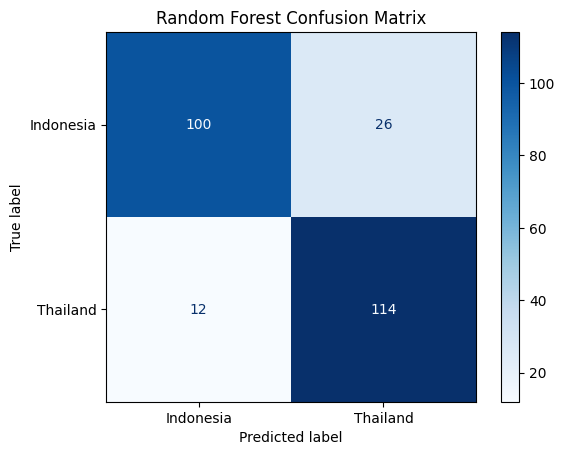

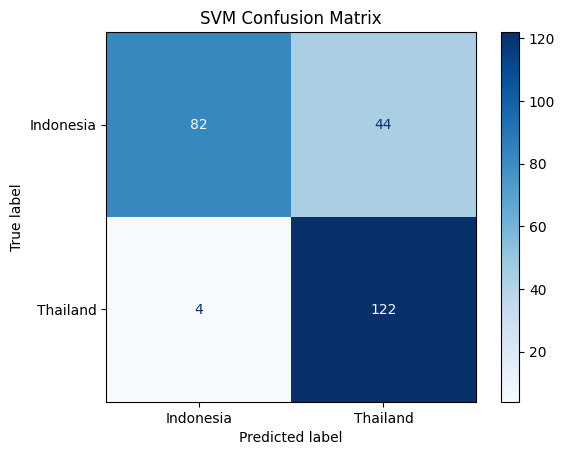

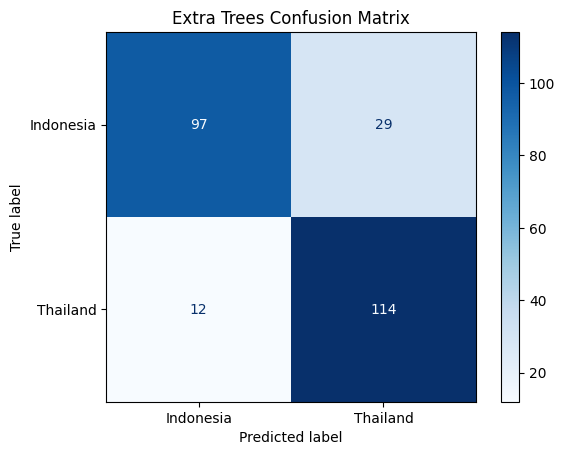

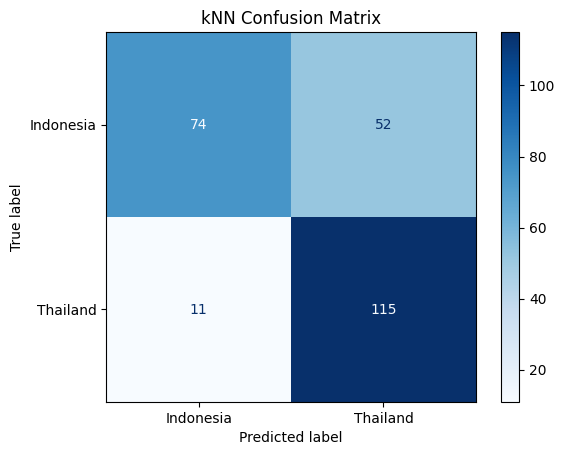

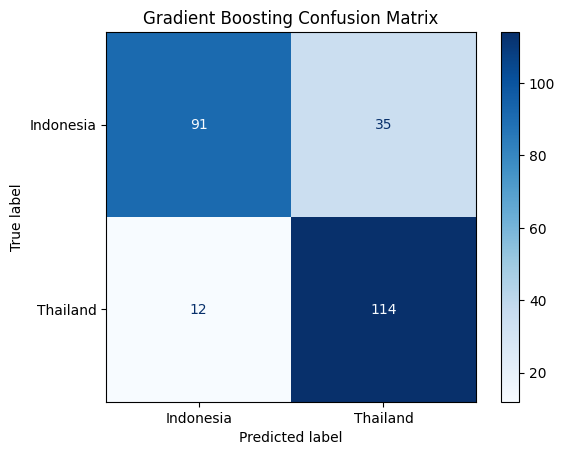

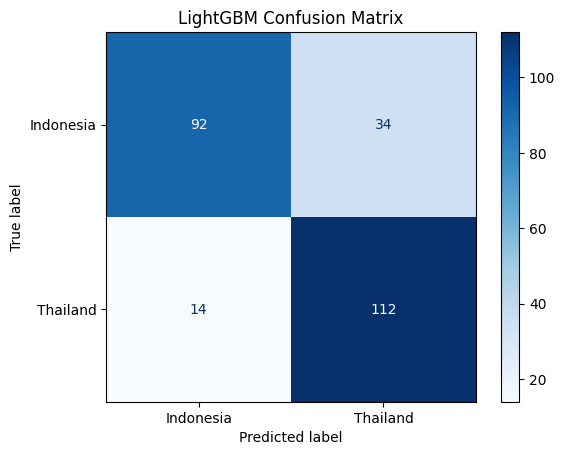

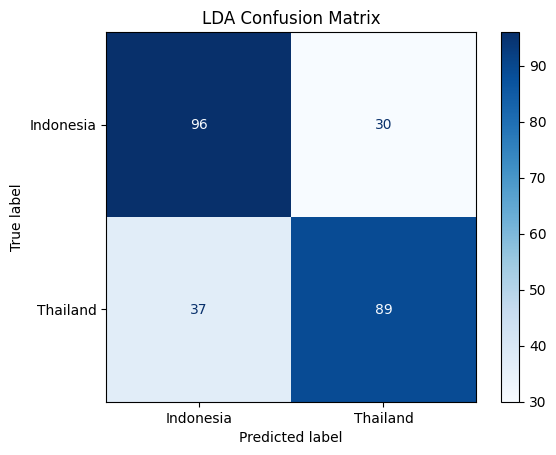

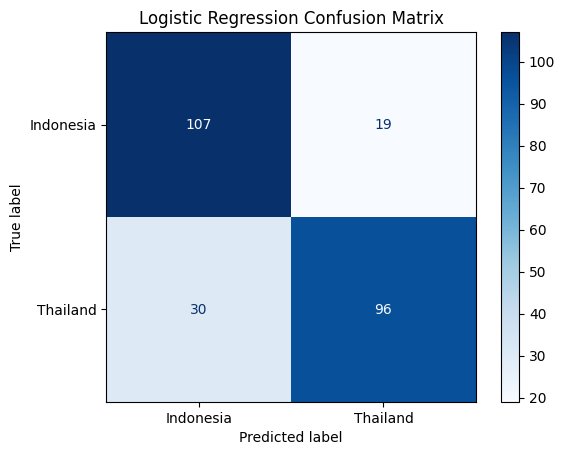

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the true labels and predictions for each classifier stored in the following variables:
# y_true_rf, y_pred_rf
# y_true_svm, y_pred_svm
# y_true_et, y_pred_et
# y_true_knn, y_pred_knn
# y_true_gbc, y_pred_gbc
# y_true_lgbm, y_pred_lgbm
# y_true_lda, y_pred_lda
# y_true_logreg, y_pred_logreg

# y_true_rf2_all, y_pred_rf2_all
# y_true_svm2_all,  y_pred_svm2_all
# y_true_et_all, y_pred_et_all
# y_true_knn_all, y_pred_knn_all
# y_true_all_gbc, y_pred_all_gbc
# y_true_all_lgbm, y_pred_all_lgbm
# y_true_all_ldar, y_pred_all_ldar_reversed
# y_true_all_logreg, y_pred_lg_flipped

# Define the class labels
class_labels = le.classes_

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Display confusion matrices for each classifier
display_confusion_matrix(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Displaying Confusion Matrices as Text Tables

In [56]:
# Function to display confusion matrix as a text table
def display_confusion_matrix_text(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(title)
    print(df_cm)
    print()

# Display confusion matrices for each classifier as text tables
display_confusion_matrix_text(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix_text(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix_text(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix_text(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix_text(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix_text(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix_text(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix_text(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Random Forest Confusion Matrix
           Indonesia  Thailand
Indonesia        100        26
Thailand          12       114

SVM Confusion Matrix
           Indonesia  Thailand
Indonesia         82        44
Thailand           4       122

Extra Trees Confusion Matrix
           Indonesia  Thailand
Indonesia         97        29
Thailand          12       114

kNN Confusion Matrix
           Indonesia  Thailand
Indonesia         74        52
Thailand          11       115

Gradient Boosting Confusion Matrix
           Indonesia  Thailand
Indonesia         91        35
Thailand          12       114

LightGBM Confusion Matrix
           Indonesia  Thailand
Indonesia         92        34
Thailand          14       112

LDA Confusion Matrix
           Indonesia  Thailand
Indonesia         96        30
Thailand          37        89

Logistic Regression Confusion Matrix
           Indonesia  Thailand
Indonesia        107        19
Thailand          30        96



Classification Report

In [57]:
from sklearn.metrics import classification_report

# Assuming you have these classification reports stored
# classification_report_rf = ...
# classification_report_svm = ...
# classification_report_et = ...
# classification_report_knn = ...
# classification_report_gbc = ...
# classification_report_lgbm = ...
# classification_report_lda = ...
# classification_report_logreg = ...

# Function to display classification report
def display_classification_report(report, model_name):
    print(f"Classification Report for {model_name}")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {label}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{label}: {metrics}")
        print()

# Call the function for each classifier
display_classification_report(report_rf_logo, "Random Forest")
display_classification_report(report_svm1_logo, "SVM")
display_classification_report(report_et_logo, "Extra Trees")
display_classification_report(report_knn_logo, "k-Nearest Neighbors")
display_classification_report(report_gbc_logo, "Gradient Boosting Classifier")
display_classification_report(report_lgbm_logo, "LightGBM")
display_classification_report(report_lda_logo_reversed, "Linear Discriminant Analysis")
display_classification_report(report_logreg_flipped, "Logistic Regression")


Classification Report for Random Forest
Class: Indonesia
precision: 0.8928571428571429
recall: 0.7936507936507936
f1-score: 0.8403361344537815
support: 126.0

Class: Thailand
precision: 0.8142857142857143
recall: 0.9047619047619048
f1-score: 0.8571428571428571
support: 126.0

accuracy: 0.8492063492063492

Class: macro avg
precision: 0.8535714285714286
recall: 0.8492063492063492
f1-score: 0.8487394957983193
support: 252.0

Class: weighted avg
precision: 0.8535714285714285
recall: 0.8492063492063492
f1-score: 0.8487394957983193
support: 252.0

Classification Report for SVM
Class: Indonesia
precision: 0.9534883720930233
recall: 0.6507936507936508
f1-score: 0.7735849056603774
support: 126.0

Class: Thailand
precision: 0.7349397590361446
recall: 0.9682539682539683
f1-score: 0.8356164383561644
support: 126.0

accuracy: 0.8095238095238095

Class: macro avg
precision: 0.844214065564584
recall: 0.8095238095238095
f1-score: 0.8046006720082709
support: 252.0

Class: weighted avg
precision: 0.8442